#  서울특별시 코로나 바이러스 크롤링 데이터

# 1. 전처리

크롤링한 데이터를 pandas 를 통해서 불러온다.

In [51]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'


In [53]:
corona_data = pd.read_csv('C:\\Users\\Master\\Desktop\\새 폴더\\corona_df_2021_08_14.csv', encoding = 'utf-8')

In [54]:
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40400 entries, 0 to 40399
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      40400 non-null  int64 
 1   환자      40400 non-null  int64 
 2   확진일     40400 non-null  object
 3   거주지     40400 non-null  object
 4   여행력     40400 non-null  object
 5   접촉력     40400 non-null  object
 6   퇴원현황    31778 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.2+ MB


## 1.1 Null 값 처리

msno를 통해서 null 값의 개수를 확인한다.  
퇴원현황 칼럼이 31778 개로 나머지 칼럼과 비교했을 때 null 값이 있음을 확인할 수 있다.

<AxesSubplot:>

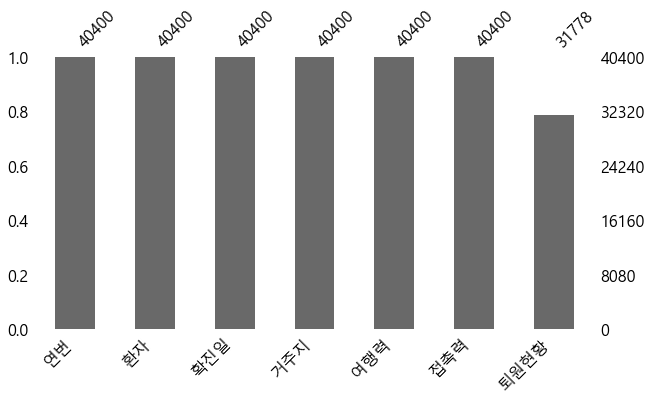

In [55]:
import missingno as msno

msno.bar(corona_data, figsize = (10,5))

<AxesSubplot:>

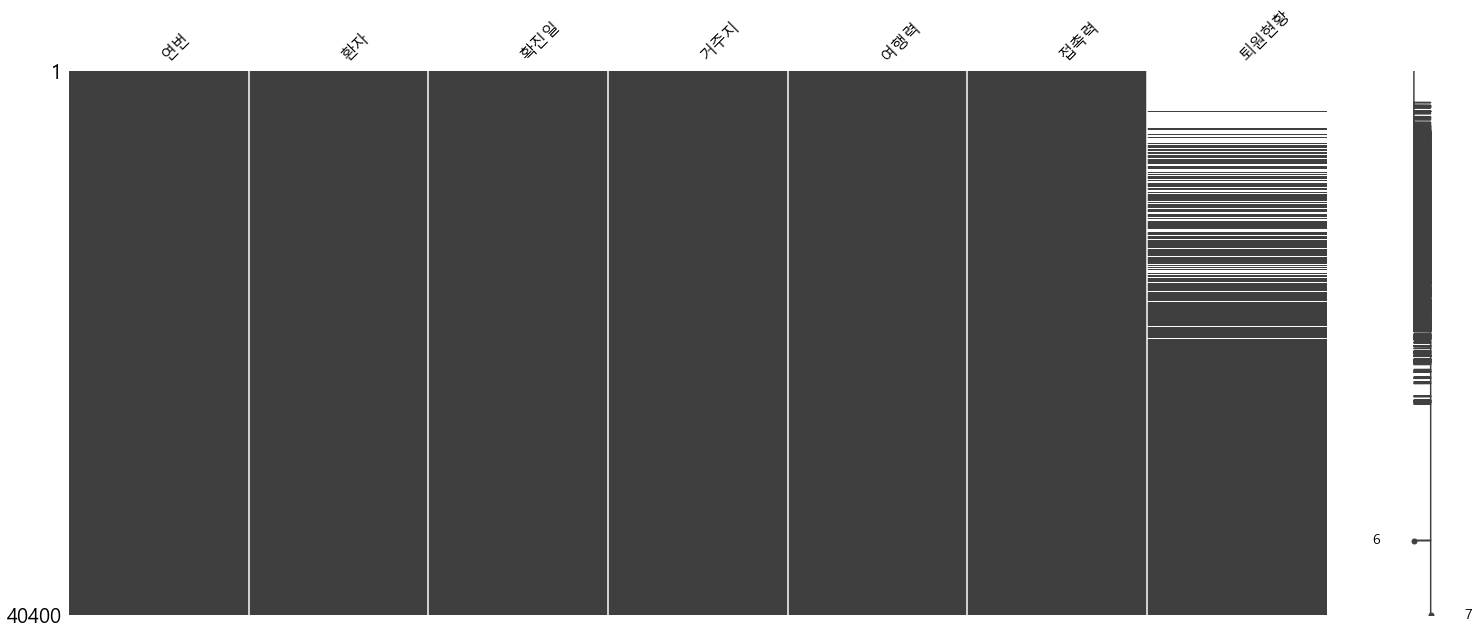

In [56]:
msno.matrix(corona_data)

### 1.1.1 퇴원현황 column

- 퇴원현황만 null 값 있는 거 확인.

In [57]:
counted_null = corona_data['퇴원현황'].isnull().sum()
print('코로나 크롤링 데이터 퇴원현황 null 개수 : ', counted_null)

코로나 크롤링 데이터 퇴원현황 null 개수 :  8622


In [58]:
# https://www.seoul.go.kr/coronaV/coronaStatus.do 
# 사이트를 확인해보니 퇴원하기 전 퇴원현황을 Null 값으로 처리했다는 것을 유추가능.
# null 을 '퇴원전' 으로 수정


corona_data['퇴원현황'].unique()

array([nan, '퇴원', '사망'], dtype=object)

In [59]:
corona_data['퇴원현황'] = corona_data['퇴원현황'].fillna('퇴원전')


<AxesSubplot:>

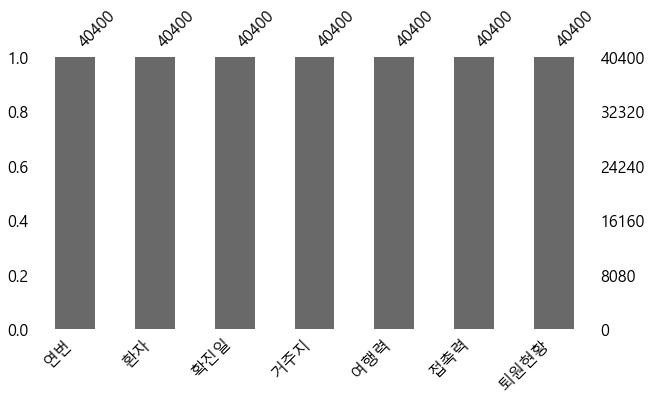

In [60]:
msno.bar(corona_data, figsize = (10,5))

### 1.1.2 여행력 column

null 값은 없지만, null 값으로 의심되는 데이터를 발견

In [61]:
corona_data['여행력'].unique()

array(['-', '미국', '독일', '폴란드', '아랍에미레이트', '카자흐스탄', '기타 확진자 접촉', '인도네시아',
       '스리랑카', '중국', '네덜란드', '인도', '러시아', '터키', '파라과이', '우즈베키스탄', '가나',
       '~8.8', '일본', '영국', '몽골', '체코', '아랍에미리트', '우크라이나', '모잠비크',
       '키르키스스탄', '베트남', '태국', '몰타', '캐나다', '키르기스스탄', '미얀마', '이라크', '프랑스',
       '모스크바', '방글라데시', '파키스탄', '네날', '네팔', '러시아(두바이경유)', '필리핀',
       '아프리카 말라위', ' ', '말레이시아', '자카르타', '멕시코', '케냐', '쿠웨이트', 'UAE',
       '캄보디아', '스웨덴', '아랍에메리드(두바이)', '미국 괌', '으즈베키스탄', '인도네시아  ', '말레이지아',
       '인도네시아 자카르타', '스페인마드리드', '타지키스탄', '키르키스탄', '도미니카공화국', '인도네시아 ',
       '아프카니스탄', '시에라리온', '마포행복나눔마켓', '  ', '핀란드', '키르기스탄', '콜롬비아', '덴마크',
       '인도 ', '싱가폴', '브라질', '오만', '아프가니스탄', '아일랜드', '이스라엘', '아랍에미리트연합',
       '남아프리카공화국', '잠비아(아디스아바바)', '미국 ', '이집트', '짐바브웨', '이집트(카타르)',
       '방글라데시,아랍에미리트', '21.5.13', '사우디아라비아', '마케도니아', '중국(시안)', '이란',
       '헝가리', '파푸아뉴기니(포트모르즈비)', '파푸아뉴기니', '페루', '21.4.7', '강릉', '불가리아',
       '수단', '스위스', '중국(장춘)', '필리핀 ', '카타르', '인도 델리', '멕시코(미국경유)',
       '오스트

In [62]:
#"-" 를 여행력 없음으로 간주, 보기 쉽게 바꿀 예정

counted_null2 = len(corona_data[corona_data['여행력'] == '-'])
print('여행력 column null 값 개수 : ', counted_null2)
corona_data[corona_data['여행력'] == '-'].sample(5)

여행력 column null 값 개수 :  39848


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
22782,48088,152381,2021-06-22,강서구,-,기타 확진자 접촉,퇴원
24694,46176,147000,2021-06-11,강북구,-,타시도 확진자 접촉,퇴원
5633,65237,201484,2021-08-02,강남구,-,감염경로 조사중,퇴원전
28027,42843,137152,2021-05-25,용산구,-,감염경로 조사중,퇴원
36782,34088,109705,2021-04-11,도봉구,-,감염경로 조사중,퇴원


In [63]:
corona_data['여행력'].replace('-','없음', inplace = True)

In [64]:
corona_data.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,70870,222111,2021-08-13,기타,없음,감염경로 조사중,퇴원전
1,70869,221232,2021-08-13,기타,없음,감염경로 조사중,퇴원전
2,70868,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전
3,70867,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전
4,70866,220502,2021-08-13,타시도,없음,기타 확진자 접촉,퇴원전


## 1.2. Feature Engineering

시각화를 하기 편하게 변수들을 가공한다.

### 1.2.1 칼럼 삭제

In [65]:
corona_data.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,70870,222111,2021-08-13,기타,없음,감염경로 조사중,퇴원전
1,70869,221232,2021-08-13,기타,없음,감염경로 조사중,퇴원전
2,70868,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전
3,70867,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전
4,70866,220502,2021-08-13,타시도,없음,기타 확진자 접촉,퇴원전


In [66]:
#연번은 의미없는 칼럼으로 보여서 삭제

corona_data.drop(['연번'], axis = 1,inplace = True)

### 1.2.2 칼럼 생성

확진일을 연도, 월, 일로 나누기

In [67]:
corona_data['연도'] = corona_data['확진일'].str.split('-', expand = True)[0]
corona_data['월'] = corona_data['확진일'].str.split('-', expand = True)[1]
corona_data['일'] = corona_data['확진일'].str.split('-', expand = True)[2]


In [68]:
#자료형 변경

corona_data['월'] = corona_data['월'].astype(int)
corona_data['일'] = corona_data['일'].astype(int)

In [69]:
corona_data.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일
0,222111,2021-08-13,기타,없음,감염경로 조사중,퇴원전,2021,8,13
1,221232,2021-08-13,기타,없음,감염경로 조사중,퇴원전,2021,8,13
2,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전,2021,8,13
3,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13
4,220502,2021-08-13,타시도,없음,기타 확진자 접촉,퇴원전,2021,8,13


# 2. 데이터 분석 and 시각화

## 2.1 코로나 확진자가 거주하는 지역 지도 표시하기

### 2.1.1 거주지별 환자수 대략 파악

In [70]:
#데이터 다시 확인

corona_data.head(10)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일
0,222111,2021-08-13,기타,없음,감염경로 조사중,퇴원전,2021,8,13
1,221232,2021-08-13,기타,없음,감염경로 조사중,퇴원전,2021,8,13
2,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전,2021,8,13
3,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13
4,220502,2021-08-13,타시도,없음,기타 확진자 접촉,퇴원전,2021,8,13
5,220262,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13
6,221253,2021-08-13,타시도,없음,기타 확진자 접촉,퇴원전,2021,8,13
7,221252,2021-08-13,타시도,없음,감염경로 조사중,퇴원전,2021,8,13
8,220223,2021-08-13,광진구,없음,감염경로 조사중,퇴원전,2021,8,13
9,221555,2021-08-13,영등포구,없음,기타 확진자 접촉,퇴원전,2021,8,13


<AxesSubplot:>

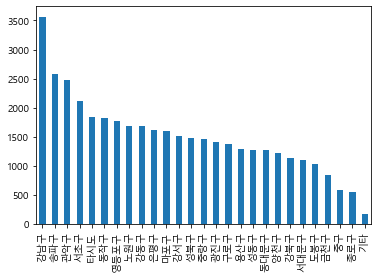

In [71]:
#어떤 지역에 확진자들이 많이 거주하는지 파악하기
corona_data['거주지'].value_counts().plot(kind = 'bar')

In [72]:
#거주지별 환자수를 data frame 으로 받아오기
residence_counts = corona_data['거주지'].value_counts()
residence_counts.reset_index()
residence_counts_df = residence_counts.reset_index().rename(columns = {"거주지" : "거주 환자수","index": "거주지"})


<AxesSubplot:title={'center':'거주지별 환자수'}, xlabel='거주지', ylabel='거주 환자수'>

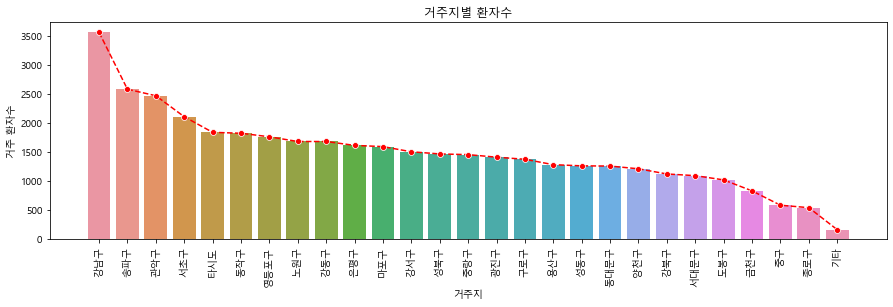

In [73]:
#거주지별 환자수 막대 그래프를 보완해서 그리기
plt.figure(figsize = (15,4))
plt.title('거주지별 환자수')
plt.xticks(rotation = 90)
sns.barplot(data = residence_counts_df, x = '거주지', y = '거주 환자수')
sns.lineplot(data = residence_counts_df, x = '거주지', y = '거주 환자수', marker = 'o', linestyle = '--', color = 'red')

### 2.1.2 거주지별 위도 경도 데이터 가져오기

거주지별 좌표 정보를 얻기위해서 크롤링 작업 실행  
네이버 map 을 사용  


In [74]:
#기타 항목은 크롤링 과정에서 읽혀와지지 않기 때문에 기타를 포함한 행 전체 삭제

corona_data[corona_data['거주지'] == '기타'].index.tolist()
for_graph_df = corona_data.drop(corona_data[corona_data['거주지'] == '기타'].index.tolist())

In [75]:
#타시도 또한 지도에 표시되지 않기 때문에 타시도를 포함한 행 전체 삭제

for_graph_df.drop(for_graph_df[for_graph_df['거주지'] == '타시도'].index.tolist(), inplace = True)

In [76]:
from urllib.request import urlopen
from urllib import parse
from urllib.request import Request
from urllib.error import HTTPError
from bs4 import BeautifulSoup
import json

In [77]:
residence_list = for_graph_df['거주지'].unique().tolist()


In [78]:
#좌표 만들기

#naver api
client_id = 'wxj67k3geg'
client_pw = 'vDFxfMNt1ToZdXJQyKeNDARNd9L0bedUMgKctuPf'

api_url = 'https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query='

#주소 목록 파일
geo_coordi = []


#특정 url 의 정보를 받고 그 정보를 json 으로 받아서 정보를 읽어오기

for residence in residence_list:
    add_urlenc = parse.quote(residence) #코로나 주소를 url 에 사용가능하도록 url encoding
    url = api_url + add_urlenc #api 주소의 query 변수에 들어갈 encoding 된 주소
    request = Request(url) #url 정보 request 로 받아오기
    request.add_header('X-NCP-APIGW-API-KEY-ID', client_id)
    request.add_header('X-NCP-APIGW-API-KEY', client_pw)
    response = urlopen(request)
    
    response_body = response.read().decode('utf-8')
    response_body_json = json.loads(response_body)

    latitude = response_body_json['addresses'][0]['y']
    longitude = response_body_json['addresses'][0]['x']
    
    geo_coordi.append([latitude, longitude])
    


In [82]:
resi_sr = pd.Series(geo_coordi)
resi_df = resi_sr.reset_index()
resi_df['index'] = residence_list

In [83]:
resi_df.rename(columns = {'index' : '지역구', 0 : '좌표'}, inplace = True)

In [84]:
resi_df[resi_df['지역구'] == '성북구']['좌표']

0    [37.5894, 127.016749]
Name: 좌표, dtype: object

In [87]:
for_graph_df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,좌표
2,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전,2021,8,13,0
3,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13,0
5,220262,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13,0
8,220223,2021-08-13,광진구,없음,감염경로 조사중,퇴원전,2021,8,13,0
9,221555,2021-08-13,영등포구,없음,기타 확진자 접촉,퇴원전,2021,8,13,0
...,...,...,...,...,...,...,...,...,...,...
40395,97579,2021-03-18,노원구,없음,도봉구 소재 어린이집 관련(`21.3.),퇴원,2021,3,18,0
40396,97537,2021-03-18,강남구,없음,서초구 소재 음악연습실 관련,퇴원,2021,3,18,0
40397,97570,2021-03-18,강동구,없음,기타 확진자 접촉,사망,2021,3,18,0
40398,97448,2021-03-18,송파구,없음,감염경로 조사중,퇴원,2021,3,18,0


In [88]:
for_graph_df['좌표'] = 0

for i in range(len(for_graph_df)):
    for j in residence_list:
        if for_graph_df.iloc[i,2] == j:
            for_graph_df.iloc[i,9] = resi_df[resi_df['지역구'] == j]['좌표']
        
        

ValueError: Incompatible indexer with Series

In [89]:
for_graph_df.sample(10)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,좌표
475,221554,2021-08-13,서대문구,없음,감염경로 조사중,퇴원전,2021,8,13,0
6005,200073,2021-08-01,광진구,없음,기타 확진자 접촉,퇴원,2021,8,1,0
28580,135511,2021-05-22,은평구,없음,기타 확진자 접촉,퇴원,2021,5,22,0
31740,125953,2021-05-06,관악구,없음,동작구 소재 병원 관련('21.5.),사망,2021,5,6,0
32328,124744,2021-05-04,강남구,없음,감염경로 조사중,퇴원,2021,5,4,0
90,221338,2021-08-13,동작구,없음,감염경로 조사중,퇴원전,2021,8,13,0
19048,160955,2021-07-05,송파구,없음,감염경로 조사중,퇴원,2021,7,5,0
22310,153335,2021-06-24,서대문구,없음,타시도 확진자 접촉,퇴원,2021,6,24,0
23561,150160,2021-06-17,종로구,없음,감염경로 조사중,퇴원,2021,6,17,0
3044,210405,2021-08-07,영등포구,없음,기타 확진자 접촉,퇴원전,2021,8,7,0


In [90]:
#좌표 x, y 값 받기


for_graph_df['y'] = 0
for_graph_df['x'] = 0

In [91]:
for i in range(len(for_graph_df)):
    for_graph_df.iloc[i,10] = for_graph_df.iloc[i,9][0]
    for_graph_df.iloc[i,11] = for_graph_df.iloc[i,9][1]
    

IndexError: invalid index to scalar variable.

In [92]:
for_graph_df['거주지'].unique()

array(['성북구', '동대문구', '광진구', '영등포구', '관악구', '강동구', '중구', '은평구', '노원구',
       '구로구', '마포구', '용산구', '종로구', '강남구', '서초구', '서대문구', '도봉구', '동작구',
       '양천구', '송파구', '금천구', '강북구', '강서구', '중랑구', '성동구'], dtype=object)

In [93]:
for_graph_df.sample(10)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,좌표,y,x
20847,157434,2021-06-30,성북구,없음,마포구 소재 댄스연습실 관련,퇴원,2021,6,30,0,0,0
29582,132539,2021-05-17,중구,없음,동대문구 소재 직장 관련('21.5.),퇴원,2021,5,17,0,0,0
11145,183162,2021-07-21,금천구,없음,서초구 소재 어린이집 관련('21.7.),퇴원전,2021,7,21,0,0,0
528,219588,2021-08-12,금천구,없음,감염경로 조사중,퇴원전,2021,8,12,0,0,0
12944,176967,2021-07-17,마포구,없음,기타 확진자 접촉,퇴원,2021,7,17,0,0,0
3384,210669,2021-08-07,마포구,없음,마포구 소재 음식점 관련('21.7.(2)),퇴원,2021,8,7,0,0,0
25356,145204,2021-06-08,성동구,없음,감염경로 조사중,퇴원,2021,6,8,0,0,0
22949,151725,2021-06-21,강남구,없음,감염경로 조사중,퇴원,2021,6,21,0,0,0
23589,149828,2021-06-17,서초구,없음,감염경로 조사중,퇴원,2021,6,17,0,0,0
21524,155351,2021-06-27,양천구,없음,감염경로 조사중,퇴원,2021,6,27,0,0,0


In [94]:
for_graph_df['x'].astype(float)
for_graph_df['y'].astype(float)

2        0.0
3        0.0
5        0.0
8        0.0
9        0.0
        ... 
40395    0.0
40396    0.0
40397    0.0
40398    0.0
40399    0.0
Name: y, Length: 38390, dtype: float64

# 본래 이렇게 해야하는데 너무 오래걸리고 오류

In [ ]:
#실제로 데이터 다 받아오기


#naver api
client_id = 'wxj67k3geg'
client_pw = 'vDFxfMNt1ToZdXJQyKeNDARNd9L0bedUMgKctuPf'

api_url = 'https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query='

#주소 목록 파일
geo_coordi = []

for add in for_graph_df['거주지']:
    add_urlenc = parse.quote(add) #코로나 주소를 url 에 사용가능하도록 url encoding
    url = api_url + add_urlenc #api 주소의 query 변수에 들어갈 encoding 된 주소
    
    request = Request(url) #url 정보 request 로 받아오기
    request.add_header('X-NCP-APIGW-API-KEY-ID', client_id)
    request.add_header('X-NCP-APIGW-API-KEY', client_pw)
    
    try:
        response = urlopen(request)
        
    except HTTPError as e:
        print('HTTP ERROR HAVE OCCURED!')
        latitude = None
        longitude = None
    
    else:
        rescode = response.getcode() #정상이면 200 return
        
        if rescode == 200: #만일 정상적으로 가동된다면
            response_body = response.read().decode('utf-8') #request로 받아온 url 정보를 response 다시 연걸 읽는다.
            response_body = json.loads(response_body) #읽은걸 json 파일로 변환
            
            if 'addresses' in response_body:
#                 print(add)
#                 print(response_body['addresses'])
                latitude = response_body['addresses'][0]['y']
                longitude = response_body['addresses'][0]['x']
                print('Process Completely')
                
            else:
                print("""'result' not exist!""")
                latitude = None
                longitude = None
        else:
            print('Respose error code : {}'.format(rescode))
            latitude = None
            longitude = None
    
    
    geo_coordi.append([latitude, longitude])

np_geo_coordi = np.array(geo_coordi)
                
            
    

### 2.1.3 folium 위한 최종 csv 저장

In [95]:
for_graph_df.to_csv("for_folium_data_corona.csv")

In [96]:
folium_df = pd.read_csv('for_folium_data_corona.csv')

In [97]:
folium_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [98]:
folium_df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,좌표,y,x
0,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전,2021,8,13,0,0,0
1,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13,0,0,0
2,220262,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13,0,0,0
3,220223,2021-08-13,광진구,없음,감염경로 조사중,퇴원전,2021,8,13,0,0,0
4,221555,2021-08-13,영등포구,없음,기타 확진자 접촉,퇴원전,2021,8,13,0,0,0


### 2.1.4 코로나 확진자 수 지도에 시각화

In [99]:
resi_series = folium_df['거주지'].value_counts().reset_index()
resi_df = resi_series.rename(columns = {'거주지':'환자수', 'index':'거주지'})

In [100]:
!pip install folium

In [101]:
import folium

In [102]:
m = folium.Map([37.589400, 127.016749], tiles="Cartodb Positron", zoom_start=6)

In [103]:
m

In [104]:
#서울시 중심부의 위도, 걍도

center = [37.541, 126.986]

#맵이 center 에 위치, zoom 레벨은 11 시작

m = folium.Map(location = center, zoom_start = 11)

In [105]:
m

### 2.1.4.1 코로나 환자수 Choropleth 로 시각화

In [106]:
import json

In [107]:
resi_df.columns = ['거주지','환자수']

In [108]:
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [109]:
m = folium.Map(location = center, tiles = 'Stamen Terrain')

In [110]:
folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = resi_df,
    columns = ['거주지','환자수'],
    key_on =  'feature.properties.name', #구로 되어있음 (경로임)
    fill_color = 'YlGn',
    fill_opacity = 0.7,
    line_opacity = 0.2,
).add_to(m)

In [111]:
m

### 2.1.4.2 코로나 환자 heat 맵으로 표시

In [112]:
heat_df = folium_df[['y','x']]
heat_data = [[j['y'],j['x']] for i,j in heat_df.iterrows()]

In [113]:
from folium.plugins import HeatMap

HeatMap(heat_data).add_to(m)

In [114]:
m

## 2.2 해외유입 환자 비율에서 어떤 나라가 확진자 수가 많은지 시각화

In [115]:
corona_data.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일
0,222111,2021-08-13,기타,없음,감염경로 조사중,퇴원전,2021,8,13
1,221232,2021-08-13,기타,없음,감염경로 조사중,퇴원전,2021,8,13
2,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전,2021,8,13
3,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13
4,220502,2021-08-13,타시도,없음,기타 확진자 접촉,퇴원전,2021,8,13


In [116]:
travel_df = corona_data[corona_data['여행력'] != '없음']
travel_df2 = travel_df['여행력'].value_counts().reset_index()
travel_df2 = travel_df2.rename(columns = {"index" : "국가명","여행력" : "환자수"})
important_travel_df = travel_df2[travel_df2['환자수'] >= 10]

In [117]:
important_travel_df

,국가명,환자수
0,미국,97
1,인도네시아,50
2,러시아,34
3,우즈베키스탄,25
4,일본,20
5,영국,18
6,터키,17
7,카자흐스탄,16
8,인도,16
9,필리핀,15


<AxesSubplot:xlabel='국가명', ylabel='환자수'>

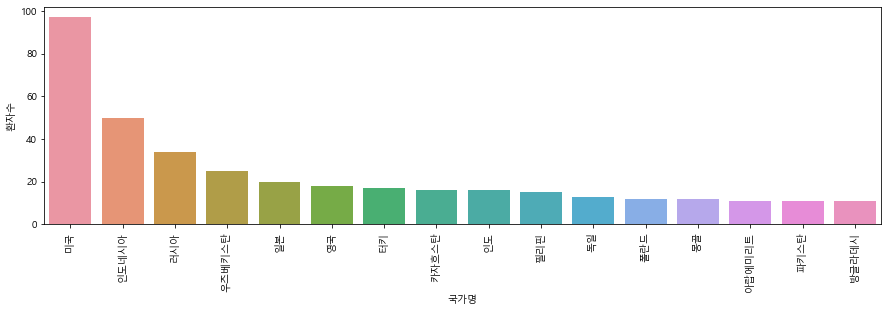

In [118]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 90)
# plt.text(x = '국가명', y = '환자수', s = 'd')
sns.barplot(data = important_travel_df, x = '국가명', y = '환자수')

## 2.3 날짜별 환자수 선그래프 그리기

### 2.3.1 2021년 월별 환자수 추이

In [119]:
for_graph_df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,좌표,y,x
2,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전,2021,8,13,0,0,0
3,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13,0,0,0
5,220262,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13,0,0,0
8,220223,2021-08-13,광진구,없음,감염경로 조사중,퇴원전,2021,8,13,0,0,0
9,221555,2021-08-13,영등포구,없음,기타 확진자 접촉,퇴원전,2021,8,13,0,0,0


In [120]:
date_corona_month = for_graph_df['월'].value_counts().reset_index().rename(columns = {"월":"확진자수","index":"월"})

In [121]:
date_corona_month = date_corona_month.sort_values(by = '월')

<AxesSubplot:xlabel='월', ylabel='확진자수'>

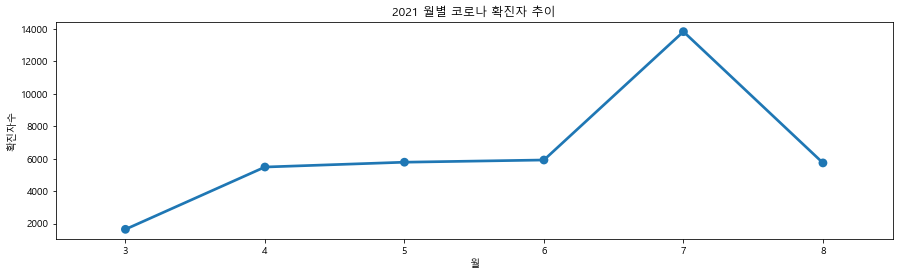

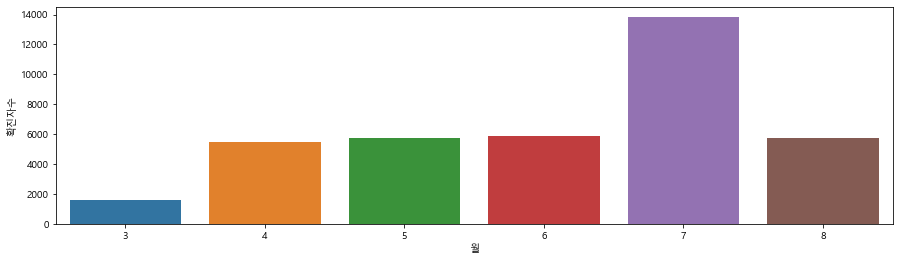

In [122]:
plt.figure(figsize = (15,4))
plt.title('2021 월별 코로나 확진자 추이')
sns.pointplot(data = date_corona_month, x = '월', y = '확진자수')
plt.figure(figsize = (15,4))
sns.barplot(data = date_corona_month, x = '월', y = '확진자수')

### 2.3.2 2021 3월 ~ 8월 확진자 수 추이

In [123]:
date_corona = for_graph_df['확진일'].value_counts().reset_index()
date_corona.rename(columns = {'확진일':'확진자수','index':'확진일'},inplace = True)

In [124]:
date_corona = date_corona.sort_values(by = '확진일')

<AxesSubplot:title={'center':'날짜별 코로나 확진자 수 2 (05_17 ~ 08_13)'}, xlabel='확진일', ylabel='확진자수'>

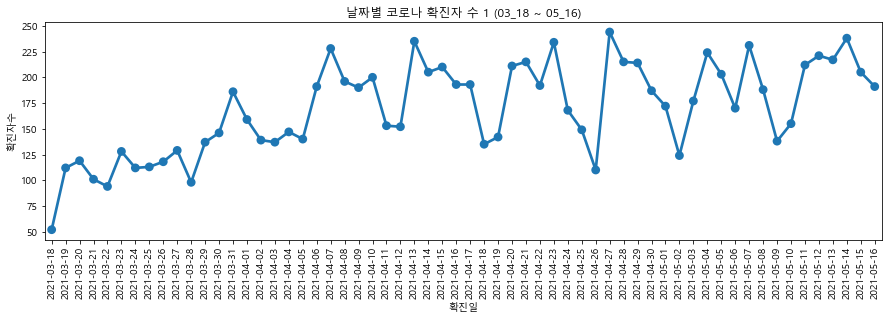

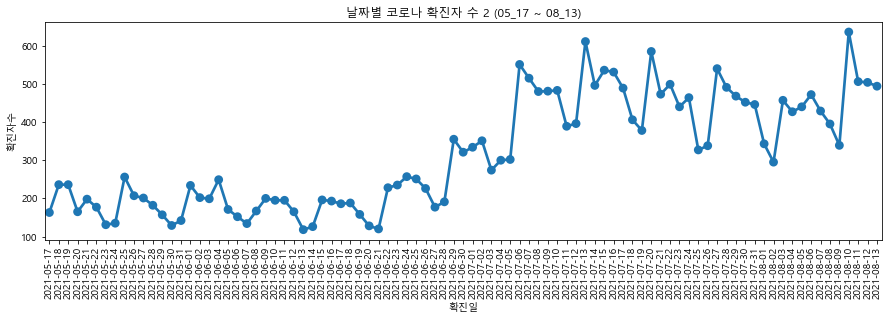

In [125]:

plt.figure(figsize = (15,4))
plt.title('날짜별 코로나 확진자 수 1 (03_18 ~ 05_16)')
plt.xticks(rotation = 90)
sns.pointplot(data = date_corona.iloc[:60,:], x = '확진일', y = '확진자수')
plt.figure(figsize = (15,4))
plt.title('날짜별 코로나 확진자 수 2 (05_17 ~ 08_13)')
plt.xticks(rotation = 90)
sns.pointplot(data = date_corona.iloc[60:,:], x = '확진일', y = '확진자수')




### 2.3.3 날짜별 거주지별 환자수

In [126]:
for_graph_df[(for_graph_df['확진일'] == '2021-03-18') &  (for_graph_df['거주지'] == '강동구')]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,좌표,y,x
40346,97741,2021-03-18,강동구,없음,수도권 지인모임 관련('21.3.(2)),퇴원,2021,3,18,0,0,0
40359,97688,2021-03-18,강동구,없음,감염경로 조사중,퇴원,2021,3,18,0,0,0
40360,97690,2021-03-18,강동구,없음,서초구 소재 직장 관련('21.3.),퇴원,2021,3,18,0,0,0
40361,97689,2021-03-18,강동구,없음,서초구 소재 직장 관련('21.3.),퇴원,2021,3,18,0,0,0
40369,97649,2021-03-18,강동구,없음,병원 및 요양시설,퇴원,2021,3,18,0,0,0
40373,97635,2021-03-18,강동구,없음,감염경로 조사중,퇴원,2021,3,18,0,0,0
40377,97712,2021-03-18,강동구,없음,기타 확진자 접촉,퇴원,2021,3,18,0,0,0
40380,97567,2021-03-18,강동구,없음,감염경로 조사중,퇴원,2021,3,18,0,0,0
40384,97568,2021-03-18,강동구,없음,감염경로 조사중,퇴원,2021,3,18,0,0,0
40397,97570,2021-03-18,강동구,없음,기타 확진자 접촉,사망,2021,3,18,0,0,0


In [127]:
date_resi_gb = for_graph_df.groupby(['확진일','거주지'])[['환자']].count()
date_resi_gb

환자
확진일        거주지    
2021-03-18 강남구   4
           강동구  10
           강북구   5
           강서구   1
           관악구   1
...             ..
2021-08-13 용산구  15
           은평구  23
           종로구  10
           중구   20
           중랑구  18

[3657 rows x 1 columns]

# 코로나 19 여행사업 관련 데이터 

In [ ]:
trip_industry_df = pd.read_excel('C:\\study\\workspace_python\\pdsample\\datasets\\mydata\\코로나19 여행관련 데이터.xlsx')

In [ ]:
trip_industry_df.T

In [ ]:
wanted_data = trip_df.T.iloc[2:20,2]
visualization_df = wanted_data.reset_index()

In [ ]:
visualization_df = visualization_df.rename(columns = {2 : 'results', 'index': '날짜'})
visualization_df.head()
visualization_df = visualization_df.sort_values(by = '날짜')
visualization_df

In [ ]:
visualization_df['results'] = visualization_df['results'].astype(int)

In [ ]:
plt.figure(figsize = (15,4))
plt.title('travel business from 2020 - 2021')
sns.lineplot(data = visualization_df, x = '날짜', y = 'results', linestyle = '--', marker = 'o')
sns.barplot(data = visualization_df, x = '날짜', y = 'results', palette='YlGn_r')
plt.xticks(rotation = 90)
plt.figure(figsize = (15,4))
plt.title('travel business from 2020 - 2021')
sns.lineplot(data = visualization_df, x = '날짜', y = 'results', linestyle = '--', marker = 'o')
plt.xticks(rotation = 90)


# plt.savefig('foryongju')